# Business Problem

The startup company **"Landmark Airlines"** is embarking on the creation of a domestic airline dedicated to serving upper-class Americans and business executives. The company is currently focused on acquiring and operating airplanes for both commercial and private use. They are particularly interested in catering to the needs of private individuals or groups of executives who might require charter services. However, Landmark Airlines lacks sufficient knowledge regarding the potential risks associated with aircraft operations. It is our responsibility to assess and identify the aircraft options with the lowest risks, providing actionable insights for the head of the new aviation division. These insights will play a pivotal role in guiding the company's decisions regarding which aircraft to invest in for this promising new business venture.

## Key Objectives


- We will conduct an analysis that will result in three distinct and practical business recommendations. By addressing the challenges of handling missing data, aggregating information, and effectively visualizing the data, We aim to empower our organization to make informed decisions based on data. We will connect these findings to the realm of business intelligence, leveraging them to offer insightful suggestions on how our company should proceed with the exciting new aviation venture.

- We understand that effective communication is of paramount importance. Our capacity to deliver value to the organization, or to secure a position within it, hinges on our proficiency in articulating our accomplishments and their significance. Our task involves crafting a narrative that our stakeholders, specifically the head of the aviation division, can easily comprehend. We will achieve this by guiding them through each step of our process, emphasizing key insights, while condensing less critical details. This approach ensures that our message is clear, engaging, and allows our audience to seamlessly follow our storyline.

- We will utilize a variety of visualizations to enhance our communication. Visual representations play a crucial role in both exploring the data and making our findings easily understandable for individuals who may not have technical expertise. Within our presentation, we will shine a spotlight on visuals that directly align with the recommendations we're making. It's advisable to opt for uncomplicated visuals, such as bar charts and line graphs, as they tend to be the most effective. Additionally, we will pay careful attention to formatting, including elements like labels and titles, to ensure that our visuals are clear and impactful.

# Data Visualization: Fatality Rates

## Setting up the workspace

The best way to understand our dataset is to visualize it. Seaborn and Matplotlib are going to be incredibily helpful for this goal. Landmark Airlines needs 3 recomendations of aircrafts to invest in based on how safe the plane is. First we must define what a "safe" aircraft constitutes as.

Some ways we can determin the safety of an aircraft:

- Calculate the total fatality rate
- Fatality rate based on Makes
- Fatality rate based on Models

As Data Scientists, it is imperative that we represent this data is a clear way for business' to understand and make clear decisions based off of. We believe the above visualization will provide us with the clearest picture.

For starters we must import the nessecary libraries and csv file(s)

In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#Ignoring ugly warnings
warnings.filterwarnings("ignore")

/Users/ndou/anaconda3/envs/learn-env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Opening CSV file and assigning it to a Dataframe varrible
df = pd.read_csv('data/cleaned_aviation.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)

In [3]:
# Reading the DataFrame
df

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,...,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Year,Month.Abbr,Day.Name.Abbr,City,State
0,Accident,1995-01-01,"LANCASTER, CA",United States,Fatal,Substantial,Airplane,Aero Commander,200D,1.0,...,0.0,1.0,VMC,Cruise,Probable Cause,1995.0,Jan,Sun,LANCASTER,CA
1,Accident,1995-01-01,"TORREON, NM",United States,Non-Fatal,Substantial,Airplane,Cessna,177B,1.0,...,0.0,2.0,VMC,Takeoff,Probable Cause,1995.0,Jan,Sun,TORREON,NM
2,Accident,1995-01-02,"FOLEY, AL",United States,Non-Fatal,Destroyed,Airplane,Piper,PA-28-151,1.0,...,0.0,1.0,VMC,Approach,Probable Cause,1995.0,Jan,Mon,FOLEY,AL
3,Accident,1995-01-02,"DAVIS, CA",United States,Non-Fatal,Substantial,Airplane,Cessna,175,1.0,...,0.0,1.0,VMC,Landing,Probable Cause,1995.0,Jan,Mon,DAVIS,CA
4,Accident,1995-01-02,"UNION CITY, TN",United States,Non-Fatal,Substantial,Airplane,Beech,V35B,1.0,...,1.0,0.0,VMC,Cruise,Probable Cause,1995.0,Jan,Mon,UNION CITY,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,Accident,2022-12-21,"Auburn Hills, MI",United States,Non-Fatal,NaN,Airplane,Cessna,172F,NaN,...,0.0,0.0,NaN,NaN,NaN,2022.0,Dec,Wed,Auburn Hills,MI
22396,Accident,2022-12-26,"Annapolis, MD",United States,Non-Fatal,NaN,Airplane,Piper,PA-28-151,NaN,...,0.0,0.0,NaN,NaN,NaN,2022.0,Dec,Mon,Annapolis,MD
22397,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,American Champion Aircraft,8GCBC,1.0,...,0.0,1.0,VMC,NaN,NaN,2022.0,Dec,Mon,Payson,AZ
22398,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,Airplane,Cessna,210N,NaN,...,0.0,0.0,NaN,NaN,NaN,2022.0,Dec,Mon,Morgan,UT


Okay now that weve managed to import and open the CSV file we can now start creating visualizations on the data that we have.

Before that lets get some information and understanding of the CSV file so we know which columns we want to use for our visualizations

In [4]:
# Gathing info on the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      22400 non-null  object 
 1   Event.Date              22400 non-null  object 
 2   Location                22397 non-null  object 
 3   Country                 22400 non-null  object 
 4   Injury.Severity         22390 non-null  object 
 5   Aircraft.damage         21631 non-null  object 
 6   Aircraft.Category       21740 non-null  object 
 7   Make                    21739 non-null  object 
 8   Model                   21738 non-null  object 
 9   Number.of.Engines       21180 non-null  float64
 10  Engine.Type             20579 non-null  object 
 11  Purpose.of.flight       21740 non-null  object 
 12  Total.Fatal.Injuries    21740 non-null  float64
 13  Total.Serious.Injuries  21740 non-null  float64
 14  Total.Minor.Injuries    21740 non-null

In [5]:
# Lets make sure that we can claerly get affirmative data rather then any "Unavailable" data
injury_data = df[df['Injury.Severity'] != 'Unavailable']

## Creating the visualizations

To understand what is unsafe we must first understand what is safe. We have 35,000+ entries of data with very minimal missingness, which means we can comfortable calculate the average fatality rate for accidents within the United States. This will give us a comfortable understanding of what airplanes tend to end in more fatalities and which ones tend to be much safer and sustainable



In [6]:
# Calculate average fatality rate
average_fatal = len(injury_data[injury_data['Injury.Severity'] == 'Fatal'].index) / len(injury_data.index)
print("Average fatality rate: " + str(round(average_fatal * 100, 2)) + '%')

Average fatality rate: 18.23%


Okay so the average fatality rate in accidents within the USA is 18.23%, for the purpose of recommending a make and model to Landmark Airlines, anything above 22% will be automatically ruled out of judgement.

Now that we know the average fatality rate, we should calculate the average fatality rate per make. The best way to do that is to create a bar-graph of the top 25 most frequently crashed makes.



### Fatality rate by make

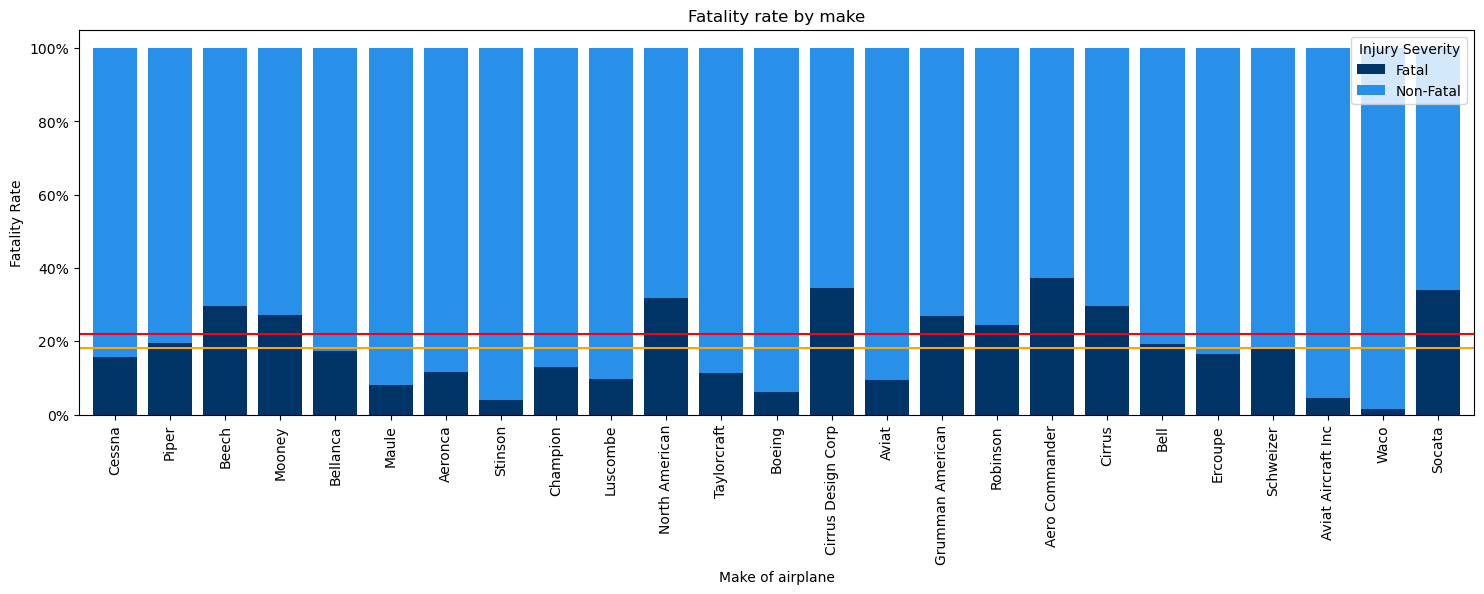

In [7]:
# Importing percent formatter
from matplotlib.ticker import PercentFormatter

# Extract list of 25 makes most frequently involved in accidents
make_top25 = df['Make'].value_counts().nlargest(25).index.tolist()

# Only keep data with a make in the top list
make_data = injury_data[injury_data['Make'].isin(make_top25)]

# Percentage fatality by make
makefatal = make_data.groupby('Make')['Injury.Severity'].value_counts(normalize = True).unstack('Injury.Severity').reindex(make_top25)
makefatal.plot.bar(stacked = True, figsize=(18,5), width = 0.8, color = ['#003366','#2990EA'])

# Line with average fatality
plt.axhline(y = average_fatal, color = 'orange', linestyle = '-')
plt.axhline(y = .22, color = 'r', linestyle = '-')

#Formatting
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Fatality rate by make')
plt.legend(title = "Injury Severity", loc='upper right')
plt.xlabel('Make of airplane')
plt.ylabel('Fatality Rate')
plt.show()

In [8]:
df['Make'].value_counts()

Make
Cessna                           7945
Piper                            5013
Beech                            1800
Mooney                            613
Bellanca                          364
                                 ... 
Engineering And Research            1
T Bird                              1
Storch Aviation Australia Pty       1
Yakovlev/Day                        1
Royse Ralph L                       1
Name: count, Length: 959, dtype: int64

It looks like there are 9 Companies above the average mortality rate in the United states. Now this doesnt mean we have to immediately get rid of them however it does give us something to look deeper into. The Orange line represents the average fatality whereas the red line represents 22% fatality rate. 22% fatality rate is completely unacceptable as it is too high risk for our stakeholders to approve. For that reason we can ignore :

- Beech
- Mooney
- North American
- Cirrus Design Corp
- Grumman American
- Robinson
- Aero Commander
- Cirrus
- Socata

The companies we should be catious of are:

- Piper
- Bell
- Schweizer

These companies require us to look more into the data behind each airplane and accident involved so that we can confidently make a recomendation off of safety

The current most promising companies:

- Cessna
- Piper

Bellanca seems to be promising but we do not have sufficent data to form a proper opinion on the fatality rate, Cessna and Piper both appear as a value over 5,000 times, whereas Bellanca appears only 364 times

Certain companies actually do not meet our standards of flight; for example, Boeing is a commerical airline which is too large scale for the business that our stakeholders are trying to run, despite the very aprovable safety metric. Some companies are helicopter based and some are simply defunct and would be too risky to support the idea of investing in.

Currently the best option at face value is likely to be the Cessna, It has the lowest fatality rate out of the other acceptable makes, as well as it has a extremely large data set comparaitive to the other datasets, meaning we for sure know that Cessnas have a very low rate of fatality. Piper also seems to be very reliable as well.

### Fatality rate by model

So what now? Do we just call it a day and tell Landmark Airlines to just buy a Cessna and Piper and hope for the best?

Well although Fatality by make is a great intial messure of safety, **it is not nearly enough**. Our stakeholders need to know what planes to invest in specifically, they asked us to bring them three recomendations and they trust our skills and judgement to achieve that goal. Lets try and narrow it down a bit more and look into the intracies of the Cessna and Piper models.

We should check the specific fatality rate of both makes.

In [9]:
# Fatality rate of Cessna and Piper
cessna_injury_rates = df.loc[df['Make'] == 'Cessna']['Injury.Severity'].value_counts(normalize = True)
piper_injury_rates = df.loc[df['Make'] == 'Piper']['Injury.Severity'].value_counts(normalize = True)
cessna_fatality = cessna_injury_rates.values[1]
piper_fatality = piper_injury_rates.values[1]

print(f'Fatality rate of Cessna: {str(round(cessna_fatality * 100, 2))}%')
print(f'Fatality rate of Piper: {str(round(piper_fatality * 100, 2))}%')
print()
print("Average fatality rate: " + str(round(average_fatal * 100, 2)) + '%')

Fatality rate of Cessna: 15.65%
Fatality rate of Piper: 19.53%

Average fatality rate: 18.23%


As shown on the bar chart earlier, Cessna is much lower than bother Piper and the average fatality rate which is great! We're taking the right steps in the right dirrection. Piper has a much higher fatality rate then Cessna but its not much higher then the average. There could be hidden varribles that are skewing or affecting the fatalility rate. For example, Piper could have a generally very low fatality rate but they may have made one aircraft that was extremely dangerous to fly which affects how the data is portrayed, there is a chance that in general, most Piper models are safer than most Cessna models. Thats why its important for us to dig a little deeper before we make a recomendation

In [10]:
cessna_models = df.loc[df['Make'] == 'Cessna']['Model'].value_counts().head(25)
piper_models = df.loc[df['Make'] == 'Piper']['Model'].value_counts().head(25)

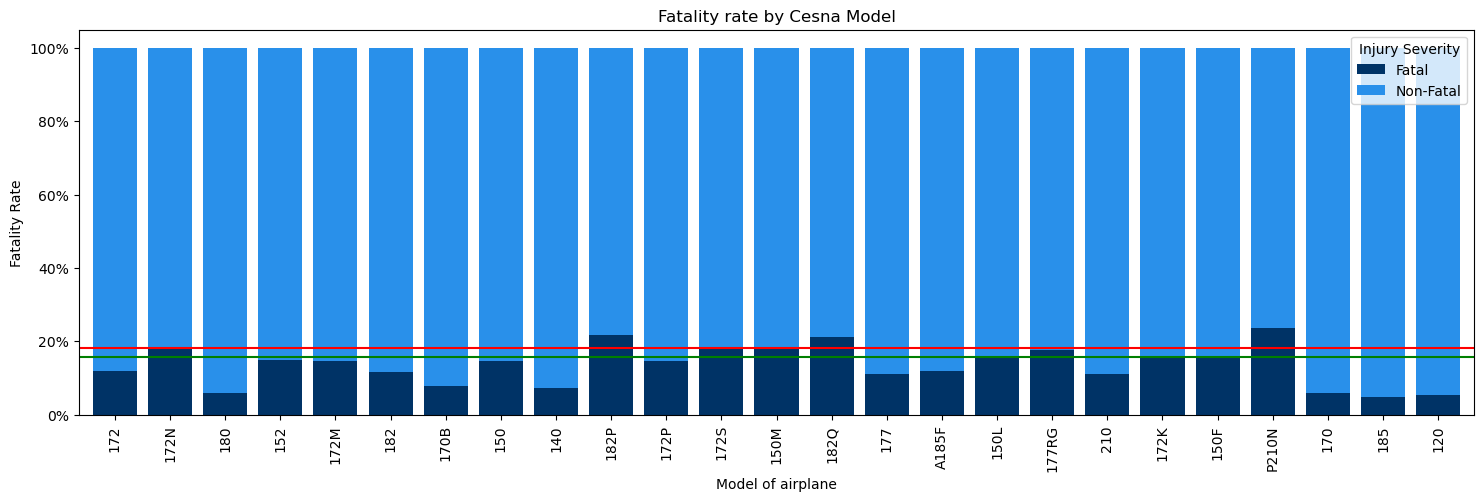

In [11]:
# Extract list of 25 Cessna models most frequently involved in accidents
ces_model_top25 = cessna_models.index.tolist()

# Only keep data with a model in the top list
ces_model_data = injury_data[injury_data['Model'].isin(ces_model_top25)]

# Percentage fatality by Cessna model
ces_model_fatal = ces_model_data.groupby('Model')['Injury.Severity'].value_counts(normalize = True).unstack('Injury.Severity').reindex(ces_model_top25)
ces_model_fatal.plot.bar(stacked = True, figsize=(18,5), width = 0.8, color = ['#003366','#2990EA'])

# Line with average fatality
plt.axhline(y = cessna_fatality, color = 'g', linestyle = '-')
plt.axhline(y = average_fatal, color = 'r', linestyle = '-')

#Formatting
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Fatality rate by Cesna Model')
plt.legend(title = "Injury Severity", loc='upper right')
plt.xlabel('Model of airplane')
plt.ylabel('Fatality Rate')
plt.show()

In [12]:
# The Graph is sorted from most data points in descending order
cessna_models

Model
172      530
172N     332
180      304
152      289
172M     260
182      247
170B     193
150      193
140      182
182P     147
172P     145
172S     144
150M     121
182Q     114
177      110
A185F    110
150L     106
177RG     91
210       90
172K      87
150F      87
P210N     86
170       86
185       79
120       76
Name: count, dtype: int64

So it looks like there are some Cessna models that are not only above the Cessna average fatality rate, **but the general average as well**. This is why its so important to make sure you do your due dilligence and go through all possibilities with your data. The Graph is sorted in descending order from its value count, so ideally we want the lowest fatality rate, closest to the left. and it looks like we have some pretty strong data recomendations!

Based of the data given, For purely Cessna models I would recommend:

- Cessna 172 (530 Values)
- Cessna 180 (304 Values)
- Cessna 170B (193 Values)

After cleaning all the data, visualizing everything, and establishing a metric of safety. I believe the lowest risk and best investments to make are on the aforementioned models

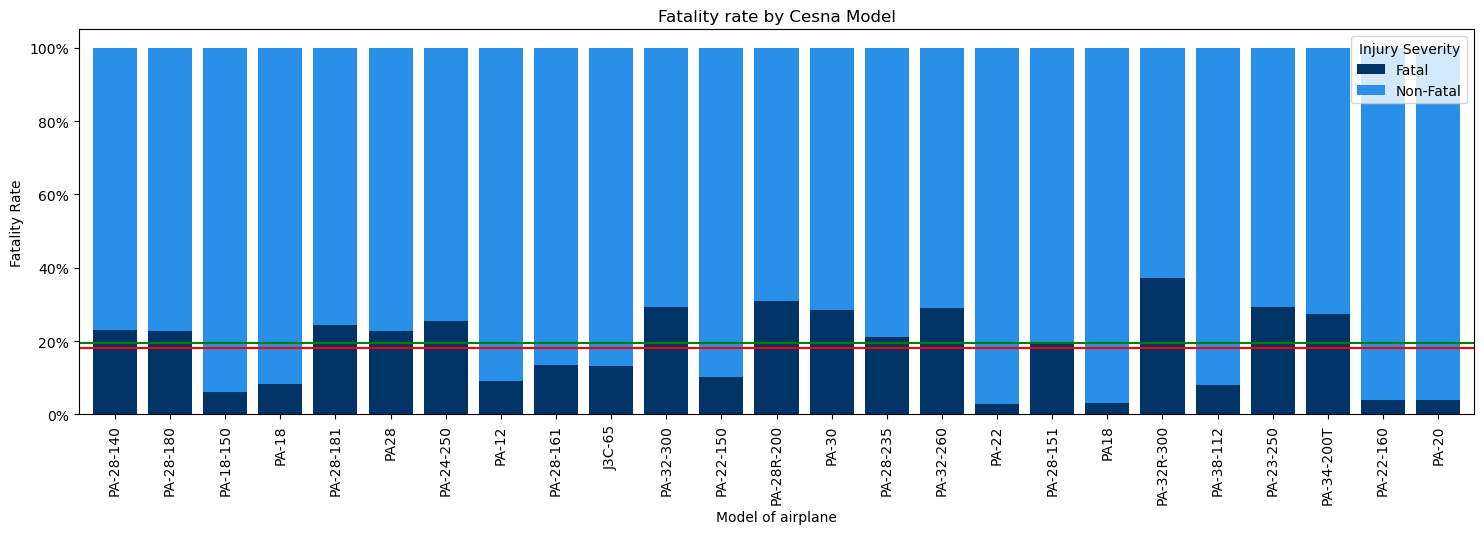

In [13]:
# Extract list of 25 Piper models most frequently involved in accidents
pip_model_top25 = piper_models.index.tolist()

# Only keep data with a model in the top list
pip_model_data = injury_data[injury_data['Model'].isin(pip_model_top25)]

# Percentage fatality by Piper model
pip_model_fatal = pip_model_data.groupby('Model')['Injury.Severity'].value_counts(normalize = True).unstack('Injury.Severity').reindex(pip_model_top25)
pip_model_fatal.plot.bar(stacked = True, figsize=(18,5), width = 0.8, color = ['#003366','#2990EA'])

# Line with average fatalitys
plt.axhline(y = piper_fatality, color = 'g', linestyle = '-')
plt.axhline(y = average_fatal, color = 'r', linestyle = '-')

#Formatting
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Fatality rate by Cesna Model')
plt.legend(title = "Injury Severity", loc='upper right')
plt.xlabel('Model of airplane')
plt.ylabel('Fatality Rate')
plt.show()

In [14]:
# The Graph is sorted from most data points in descending order
piper_models

Model
PA-28-140     288
PA-28-180     241
PA-18-150     236
PA-18         190
PA-28-181     173
PA28          141
PA-24-250     138
PA-12         133
PA-28-161     118
J3C-65        113
PA-32-300     109
PA-22-150     107
PA-28R-200    100
PA-30          88
PA-28-235      85
PA-32-260      76
PA-22          72
PA-28-151      66
PA18           63
PA-32R-300     62
PA-38-112      62
PA-23-250      58
PA-34-200T     55
PA-22-160      51
PA-20          50
Name: count, dtype: int64

The Piper set is noticably smaller than the Cessna set, I dont feel entirely comfortable taking more than 2 models from Piper because of that reasoning. I believe theres only two reliable sources of data within this set as the amount of data get extremely small towards the right side.

However This did yield pretty good results, As for Business Recomendations for strictly piper models:

- Piper PA-18-150 (236 values)
- Piper PA-18     (190 values)

I can concretely say that the 5 safest airplanes for Landmark Airlines to invest in are:

- Cessna 172 (530 Values)
- Cessna 180 (304 Values)
- Piper PA-18-150 (236 values)
- Cessna 170B (193 Values)
- Piper PA-18     (190 values)

# Data Visualization: Weather Conditions

It would be naive to believe that simply investing in aircrafts with the lowest fatality rate would be sufficient. There are many factors that play into the survival rate of indiviuals within that aircraft. Time of day, weather conditions, pilot decisions, there are many things that could contribute to the statistic. But we need something consistent, something concrete that we can reliably understand.

Weather conditions are a major concern. Its for a good reason that flights often get delayed during inclimate weather conditions. Which can make takeoff and landing incredibly difficult for the pilot, as well as the risk of severe turbulance. There are two types of weather conditions that are messured within the data set for us to understand.

- IMC (Instrument Meteorological Conditions)
- VMC (Visual Meteorological Conditions)

VMC can be described as "the meteorological conditions expressed in terms of visibility" whereas IMC can be described as "weather conditions that require pilots to fly primarily by reference to flight instruments". It would be safe to assume that IMC is more dangerous to fly in compared to VMC but we should check the data to be sure.


Through Visualizing:

- Fatality rate of VMC and IMC compared to the averaqe flight fatality rate
- Comparison between the amount of VMC and IMC flights within the data set
- Aircraft damage based on weather conditions

We can hope to fully understand what would be the safest and most ideal flight conditions.

### Amount of VMC and IMC flights

Understanding the amount of data were working with is necessary. This is a data set about accidents within the United States, if there is a large amount of data on one side it could tell us a story about what is safe and what isnt . But it could also just tell us what the commonality of flights are. By first understanding how much data were working with, we can then dissect the causation of the data spread and grouping.

Lets make a cat plot to visualize what were working with.

In [15]:
# Removing any unknown values
weather_data = df = df[df['Weather.Condition'] != 'Unknown']

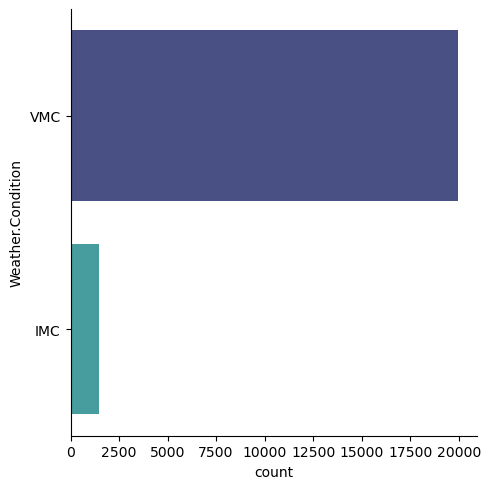

In [40]:
# Creating a cat plot
sns.catplot(y ="Weather.Condition",data = weather_data , kind= "count", palette = 'mako');

Wow thats alot of VMC flights, however whats the exact ratio of flight?

In [17]:
weather_data['Weather.Condition'].value_counts(normalize = True)

Weather.Condition
VMC    0.931906
IMC    0.068094
Name: proportion, dtype: float64

93% of accidents within the USA are VMC flights. This can mean two things. VMC flights are incredibly dangerous and are where the bulk of accidents occur, or most flights tend to happen during VMC weather conditions, which would actually suggest VMC is prefered. 

Knowing the data, we can infer that VMC is actually the safer flight condition. Most of the flights occur during VMC conditions however VMC means that you can visually see whats going on without the need of airplane instruments. Meaning that theres no fog, no heavy storms, nothing to harm your vision which would require you to use instruments. But just to be sure we should check the fatality rates of each condition.

### Fatality rate of VMC and IMC flights

A simple bar graph with the average fatality rate of VMC and IMC flights compared to the average fatality rate of all flights within the nation should be perfect to visualize what we need.

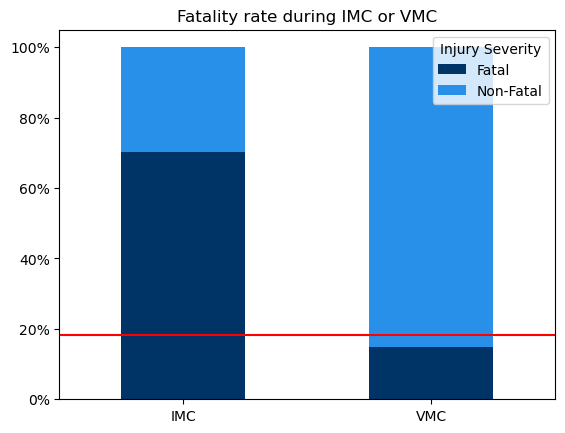

In [18]:
# Remove data without weather condition and injury severity
weather_data = injury_data[injury_data['Weather.Condition'] != 'Unknown']


# Stacked relative frequencies of accidents happening during certain weather conditions
weather_data.groupby('Weather.Condition')['Injury.Severity'].value_counts(normalize = True).unstack('Injury.Severity').plot.bar(stacked = True, color = ['#003366','#2990EA'])

# Line with average fatality
plt.axhline(y = average_fatal, color = 'r', linestyle = '-')

#Formatting
plt.xticks(rotation = 0)
plt.title('Fatality rate during IMC or VMC')
plt.xlabel('')
plt.legend(title = "Injury Severity", loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

Looks like I was correct, VMC had the largest amount of data but it still had a lower fatality rate compared to IMC flights. Contextually this makes sense, pilots are going to have a much easiser time flying in visually clear conditions. During IMC flights the pilot not only has to worry about not being able to see as clearly, but whatever is obstructing his vision can physically affect the aircraft as well, during thunder storms they wouldnt be able to see much but the rain and thunder, as well as potential humidity or other conditions would affect how the actual flight of the plane goes as well.

### Aircraft damage based on weather condition

In [19]:
# Fatality rates repsented in numeric form
df.groupby('Weather.Condition')['Injury.Severity'].value_counts(normalize = True)

Weather.Condition  Injury.Severity
IMC                Fatal              0.702128
                   Non-Fatal          0.297872
VMC                Non-Fatal          0.851976
                   Fatal              0.148024
Name: proportion, dtype: float64

IMC has a fatality rate of 70%. If possible, IMC conditions should be avoided. All though this gives us a pretty good idea of where most people tend to die during these flights, it doesnt tell us the entire story. We can also check the status of the airplanes after the crash. Lets make a bar chart to visualize the rate of damages.

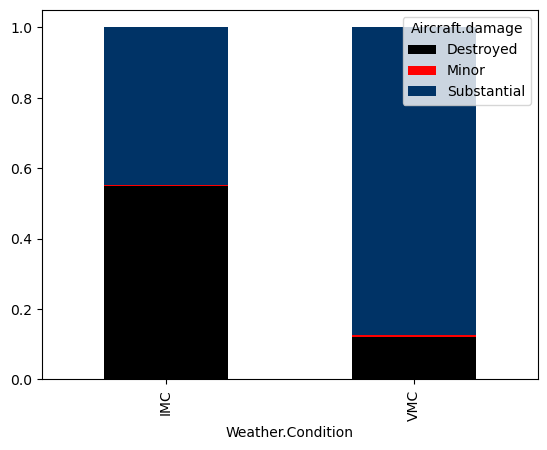

In [52]:
# Remove data without weather condition and injury severity
damage_data = df[df['Aircraft.damage'] != 'Unknown']

# Plotting the bar graph
damage_data.groupby('Weather.Condition')['Aircraft.damage'].value_counts(normalize = True) \
.unstack('Aircraft.damage').plot.bar(stacked = True, color = ['#000000','#FF0000', '#003366']);


In [53]:
# Data in numeric form
damage_data.groupby('Weather.Condition')['Aircraft.damage'].value_counts(normalize = True)

Weather.Condition  Aircraft.damage
IMC                Destroyed          0.550446
                   Substantial        0.448868
                   Minor              0.000686
VMC                Substantial        0.874742
                   Destroyed          0.119661
                   Minor              0.005597
Name: proportion, dtype: float64

Over 50% of IMC flights end with the destruction of the aircraft. The data is substantial. Under no circumstance should we fly clients during these conditions. It is entirely possible that a flight may take off during VMC weather but it may shift into IMC. However this is avoidable

- Checking the forecast
- Canceling, delaying, and rescheduling flights if conditions are not safe

The Fatality Rates of IMC flights are extremely high as well as the rate of destroyed aircrafts produced by IMC flights. Under absolutely **zero** circumstances should we charter flights during these conditions. Avoid it at all costs.

# Data Visualization : Fatality rate per state